## Brief Projet : 

Vous êtes un data analyst ,vous travaillez en bénévolat pour la médiathèque de la ville qui a mis en place un site web pour la vente de certains livres de son stock.. et elle souhaite analyser les caractéristiques sa clientèle pour mieux comprendre les tendances de leurs reservations/achats de livres. 

La médiathèque vous donne accès à leur site : http://books.toscrape.com/index.html. et souhaite que vous collectez/analysez leurs données.


**Étapes du projet** :

1. **Collecte de données** : 
* Utiliser la bibliothèque `requests` pour envoyer des requêtes HTTP au site web qui répertorie les livres. Vous récupérez le contenu HTML de la page web.

* A l'aide de la bibliothèque `Beautiful Soup`, analyser le contenu HTML du site et extraire les informations pertinentes: parcourir le code HTML, identifier les balises cibles (qui contiennent les données sur les livres, telles que `<div>` ou `<li>` ) et extraire les informations pertinentes telles que le nom du livre, la catégorie, la note moyenne des avis, le nombre de livres en stock, le prix etc.

2. **Nettoyage et préparation des données** : nettoyer les valeurs, convertir les types de données si nécessaire, gérer les valeurs manquantes, etc.

3. **Stockage des données** : 
* Proposer une modélisation de base de données SQL adaptée. 
* Créer le schéma de la base de données , les différentes tables pour stocker les données propres sur les livres.

4. **Analyse des données** : 

* Faire une analyse exploratoire des données : identification de KPIs pertinents ,création de graphiques, le calcul de statistiques descriptives, l'identification de tendances, etc => pour aider la médiathèque à mieux faire son étude de clientèle. 



### Importer les librairies

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Collecte de données

####  Récupérer les livres de la première page

In [2]:
# URL de la page principale
url = "http://books.toscrape.com/"

#code pour retrouver les élements de la page
response = requests.get(url)

#qu'est ce que l'element response ?
response?

Type:        Response
String form: <Response [200]>
File:        ~/Documents/Simplon/simplon/lib/python3.11/site-packages/requests/models.py
Docstring:  
The :class:`Response <Response>` object, which contains a
server's response to an HTTP request.

In [3]:
#quels sont ses attributs 
response.__attrs__

['_content',
 'status_code',
 'headers',
 'url',
 'history',
 'encoding',
 'reason',
 'cookies',
 'elapsed',
 'request']

In [4]:
#exemple
print(response.status_code)
print()
print (response.headers)
print()
print(response.content)

200

{'Date': 'Fri, 10 Nov 2023 12:36:01 GMT', 'Content-Type': 'text/html', 'Content-Length': '51294', 'Connection': 'keep-alive', 'Last-Modified': 'Wed, 08 Feb 2023 21:02:32 GMT', 'ETag': '"63e40de8-c85e"', 'Accept-Ranges': 'bytes'}

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- L

In [ ]:
#on utilise la librairie Beatiful Soup pour lire / analyser les doculements html
soup = BeautifulSoup(response.content, 'html.parser')
#soup

In [6]:
#Comment accèder aux elements de la page ?
temp = soup.find_all('h3')
print(type(temp))
print(len(temp))
print()
print(temp[0])
print(temp[1])
print(temp[2])
print(temp[3])

<class 'bs4.element.ResultSet'>
20

<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<h3><a href="catalogue/tipping-the-velvet_999/index.html" title="Tipping the Velvet">Tipping the Velvet</a></h3>
<h3><a href="catalogue/soumission_998/index.html" title="Soumission">Soumission</a></h3>
<h3><a href="catalogue/sharp-objects_997/index.html" title="Sharp Objects">Sharp Objects</a></h3>


In [7]:
#Comment accéder aux élements de la balise ?
temp_elt = temp[0]
print(temp_elt.a.attrs['href'])
print(temp_elt.a.get('href'))

catalogue/a-light-in-the-attic_1000/index.html
catalogue/a-light-in-the-attic_1000/index.html


#### Récupérer la liste des catégories

In [3]:
url = "http://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [12]:
# Créer une liste avec les liens href de toutes les catégories
categories_urls=[]
categorie_list=soup.find('ul',{'class':'nav-list'})
categories=categorie_list.find_all('a')
for elt in categories:
    
    categories_urls.append('http://books.toscrape.com/'+elt.get('href'))
    
categories_urls

['http://books.toscrape.com/catalogue/category/books_1/index.html',
 'http://books.toscrape.com/catalogue/category/books/travel_2/index.html',
 'http://books.toscrape.com/catalogue/category/books/mystery_3/index.html',
 'http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html',
 'http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html',
 'http://books.toscrape.com/catalogue/category/books/classics_6/index.html',
 'http://books.toscrape.com/catalogue/category/books/philosophy_7/index.html',
 'http://books.toscrape.com/catalogue/category/books/romance_8/index.html',
 'http://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html',
 'http://books.toscrape.com/catalogue/category/books/fiction_10/index.html',
 'http://books.toscrape.com/catalogue/category/books/childrens_11/index.html',
 'http://books.toscrape.com/catalogue/category/books/religion_12/index.html',
 'http://books.toscrape.com/catalogue/category/books/nonfictio

#### Récupérer les livres de toutes les pages  

In [9]:

# Fonction pour extraire les informations d'une page donnée
def extract_book_info(page_url):
    books=[]
    response = requests.get(page_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        #livres = soup.find_all(class_='product_pod')
        livres = soup.find_all('article', {'class': 'product_pod'})
        #print(livres)
        for livre in livres:

            titre = livre.h3.a.get('title')

            rating = livre.find('p', {'class': 'star-rating'}).get('class')[1]

            prix = livre.select('div p.price_color')[0].text[2:]

            disponibilite = livre.select('div p.availability')[0].text.strip()

            books.append({'title': titre, 'rating': rating, 'price': prix, 'availability': disponibilite})
        df_books=pd.DataFrame(books)
            
            
    return df_books

In [14]:
p=extract_book_info('http://books.toscrape.com/catalogue/page-2.html')

In [15]:
print(p.shape[0])
p.head()

20


,title,rating,price,availability
0,In Her Wake,One,12.84,In stock
1,How Music Works,Two,37.32,In stock
2,Foolproof Preserving: A Guide to Small Batch J...,Three,30.52,In stock
3,Chase Me (Paris Nights #2),Five,25.27,In stock
4,Black Dust,Five,34.53,In stock


In [7]:
#Récupérer le nbre de pages Max du site

nb_pages = int(soup.find('li', {'class': 'current'}).get_text().split()[-1])

print(nb_pages)

50


In [10]:
# Boucle sur l'ensemble des pages pour avoir la totalité des 1000 livres
#nb_pages = 50

all_books_2 = []
for i in range(nb_pages) : 
    url = f'http://books.toscrape.com/catalogue/page-{i+1}.html'
    df = extract_book_info(url)
    all_books_2.append(df)

In [11]:
print(type(all_books_2))
print(len(all_books_2))
print (all_books_2[0].shape[0])

<class 'list'>
50
20


In [12]:
df_books_ = pd.concat(all_books_2)
df_books_.shape

(1000, 4)

In [19]:
df_books_.head()

,title,rating,price,availability
0,A Light in the Attic,Three,51.77,In stock
1,Tipping the Velvet,One,53.74,In stock
2,Soumission,One,50.10,In stock
3,Sharp Objects,Four,47.82,In stock
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock


In [20]:
print('All_books:',type(all_books_2),'de ',len(all_books_2),'pages,  avec' ,all_books_2[0].shape[0], 'livres par page')

All_books: <class 'list'> de  50 pages,  avec 20 livres par page


#### Récupérer les livres de toutes les pages avec leurs  catégories

solution avec la boucle while  
Raisonnement :   
Si une page n'existe pas, la requête envoie une `response.status_code == 404`  
On peut donc tester  
'http://books.toscrape.com/catalogue/category/books/mystery_3/page-**i**.html'
tant que la condition `response.status_code == 404`   n'est pas vérifiée 
Ce qui evite d'avoir à connaître le nombre de page avant de faire la requête

In [32]:
url_category = 'http://books.toscrape.com/catalogue/category/books/mystery_3/page-8.html'
response = requests.get(url_category)
response

<Response [404]>

In [33]:
BeautifulSoup(response.text, 'html.parser')

<html>
<head><title>404 Not Found</title></head>
<body>
<center><h1>404 Not Found</h1></center>
<hr/><center>nginx/1.21.6</center>
</body>
</html>

Mis bout à bout :

    1. Créer une fonction qui retrouve pour chaque élément livre les informations titre, prix, note et disponibilité
    
    2. Créer une fonction qui à partir de la page d'accueil  
        a. retrouve l'ensemble des catégories 
        b. pour chaque catégorie -> retrouve l'ensemble des élements livres (sur lesquels on utilisera la première fonction) de chacune des pages de la catégories

In [13]:
def collecter_informations_livres(url, category):
    books = []
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    livres = soup.find_all('article', {'class': 'product_pod'})
    for livre in livres:
        titre = livre.h3.a.get('title')
        rating = livre.find('p', {'class': 'star-rating'}).get('class')[1]
        prix = livre.select('div p.price_color')[0].text[2:]
        disponibilite = livre.select('div p.availability')[0].text.strip()
        books.append({'title': titre, 'rating': rating, 'price': prix, 'availability': disponibilite, 'category': category})
    return pd.DataFrame(books)

In [14]:

def collecter_categories_et_noms_livres(url):
    #initialisation des listes
    categories = []
    nb_livres_par_categorie = []
    all_books = []
    categories_urls = []

    #interrogation de la page url donnée en entrée
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    #a. On retrouve l'ensemble des catégories du site : on enregistre leur url dans une liste
    nav_list = soup.find('ul', {'class': 'nav-list'})
    for category in nav_list.find_all('a'):
        categories_urls.append('http://books.toscrape.com/' + category.get('href'))

    #b. On vient interroger chacune des pages urls pour retrouver les livres
    for category_url in categories_urls:
        response = requests.get(category_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        titre_categorie = soup.find('h1').text
        categories.append(titre_categorie)
        nb_livres = 0 #on initie le compteur pour connaitre le nombre de livre par catégorie
        page = 1
        print("Categorie {} : start importing books".format(titre_categorie))
        while True:
            #la boucle pour parcourir l'ensemble des pages de la catégorie
            url = f"{category_url.replace('index.html', '')}page-{page}.html"
            response = requests.get(url)
            if response.status_code == 404:
                #l'url créée f"{category_url.replace('index.html', '')}page-{page}.html" ne fonctionne pas
                #on récupère les informations de l'url précédente
                # on utilise category_url
                df_books = collecter_informations_livres(category_url, titre_categorie)
                nb_livres += len(df_books)
                all_books.append(df_books)
                break
            # on utilise la première fonction pour avoir les informations sur les livres
            #avec l'url créé juste avant
            #on utilise url
            df_books = collecter_informations_livres(url, titre_categorie)
            nb_livres += len(df_books)
            all_books.append(df_books)
            next_button = soup.find('li', {'class': 'next'})
            if not next_button:
                break
            page += 1
        nb_livres_par_categorie.append(nb_livres)
        print("--> done with {} books".format(nb_livres))
    book_infos = pd.concat(all_books, ignore_index=True)
    return categories, nb_livres_par_categorie, book_infos

In [15]:
url = 'http://books.toscrape.com/index.html'
categories, nb_livres_par_categorie, book_infos = collecter_categories_et_noms_livres(url)
print(book_infos.shape)

Categorie Books : start importing books
--> done with 1020 books
Categorie Travel : start importing books
--> done with 11 books
Categorie Mystery : start importing books
--> done with 52 books
Categorie Historical Fiction : start importing books
--> done with 46 books
Categorie Sequential Art : start importing books
--> done with 95 books
Categorie Classics : start importing books
--> done with 19 books
Categorie Philosophy : start importing books
--> done with 11 books
Categorie Romance : start importing books
--> done with 55 books
Categorie Womens Fiction : start importing books
--> done with 17 books
Categorie Fiction : start importing books
--> done with 85 books
Categorie Childrens : start importing books
--> done with 49 books
Categorie Religion : start importing books
--> done with 7 books
Categorie Nonfiction : start importing books
--> done with 130 books
Categorie Music : start importing books
--> done with 13 books
Categorie Default : start importing books
--> done with 17

In [37]:
df_categories = pd.DataFrame({'category': categories, 'nb_books': nb_livres_par_categorie})

In [38]:
df_categories

,category,nb_books
0,Books,1020
1,Travel,11
2,Mystery,52
3,Historical Fiction,46
4,Sequential Art,95
5,Classics,19
6,Philosophy,11
7,Romance,55
8,Womens Fiction,17
9,Fiction,85


In [39]:
book_infos

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books
...,...,...,...,...,...
2255,Why the Right Went Wrong: Conservatism--From G...,Four,52.65,In stock,Politics
2256,Equal Is Unfair: America's Misguided Fight Aga...,One,56.86,In stock,Politics
2257,Amid the Chaos,One,36.58,In stock,Cultural
2258,Dark Notes,Five,19.19,In stock,Erotica


In [41]:
book_infos.to_csv('books_2.csv',index=False,header=True)

### Nettoyage et préparation des données

In [2]:
df1=pd.read_csv('books_2.csv')
display(df1.head())
print(df1.shape)

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books


(2260, 5)


In [3]:
df1.groupby(['category'])['title'].count()

category
Academic                 1
Add a comment           87
Adult Fiction            1
Art                      8
Autobiography            9
Biography                5
Books                 1020
Business                12
Childrens               49
Christian                3
Christian Fiction        6
Classics                19
Contemporary             3
Crime                    1
Cultural                 1
Default                172
Erotica                  1
Fantasy                 68
Fiction                 85
Food and Drink          50
Health                   4
Historical               2
Historical Fiction      46
History                 18
Horror                  17
Humor                   10
Music                   13
Mystery                 52
New Adult                6
Nonfiction             130
Novels                   1
Paranormal               1
Parenting                1
Philosophy              11
Poetry                  19
Politics                 3
Psychology         

In [4]:
df1.groupby(['title'])['category'].count().sort_values(ascending=False)

title
The Star-Touched Queen                                                                            6
The Requiem Red                                                                                   4
Tipping the Velvet                                                                                4
Soumission                                                                                        4
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics    4
                                                                                                 ..
Lamb: The Gospel According to Biff, Christ's Childhood Pal                                        2
Large Print Heart of the Pride                                                                    2
Last One Home (New Beginnings #1)                                                                 2
Lean In: Women, Work, and the Will to Lead                                                    

In [5]:
df1[df1.title=="The Star-Touched Queen"]

,title,rating,price,availability,category
236,The Star-Touched Queen,Five,46.02,In stock,Books
358,The Star-Touched Queen,Five,32.30,In stock,Books
1900,The Star-Touched Queen,Five,46.02,In stock,Fantasy
1907,The Star-Touched Queen,Five,32.30,In stock,Fantasy
1948,The Star-Touched Queen,Five,46.02,In stock,Fantasy
1955,The Star-Touched Queen,Five,32.30,In stock,Fantasy


In [6]:
df1[df1.title=="salt."]

,title,rating,price,availability,category
269,salt.,Four,46.78,In stock,Books
2061,salt.,Four,46.78,In stock,Poetry


In [7]:
df1[df1.title=="Packing for Mars: The Curious Science of Life in the Void"]

,title,rating,price,availability,category
795,Packing for Mars: The Curious Science of Life ...,Two,56.68,In stock,Books
1737,Packing for Mars: The Curious Science of Life ...,Two,56.68,In stock,Default


#### Comprendre la structure des données + Analyse descriptive 


* Etudier la structure du DataFrame : head(), info(),describe() , observer les diff types de données, les valeurs manquantes,les doublons, les statistiques sommaires, etc.


In [8]:
df1.describe(include='all')

,title,rating,price,availability,category
count,2260,2260,2260.000000,2260,2260
unique,999,5,NaN,1,51
top,The Star-Touched Queen,One,NaN,In stock,Books
freq,6,511,NaN,2260,1020
mean,NaN,NaN,35.045257,NaN,NaN
std,NaN,NaN,14.410846,NaN,NaN
min,NaN,NaN,10.000000,NaN,NaN
25%,NaN,NaN,22.110000,NaN,NaN
50%,NaN,NaN,35.880000,NaN,NaN
75%,NaN,NaN,47.610000,NaN,NaN


##### Gestion des valeurs manquantes

* Rechercher des valeurs manquantes  à l'aide de la méthode `.isnull()` ou `.isna()`. 

=> Si vous en trouvez, vous pouvez décider de les supprimer ou de les remplacer par des valeurs appropriées.

In [9]:
 #Vérifier les valeurs manquantes
df1.isnull().sum()

title           0
rating          0
price           0
availability    0
category        0
dtype: int64

#####  Gestion des doublons

* Utiliser la méthode `drop_duplicates()` pour supprimer les lignes dupliquées.


In [10]:
# Vérifier les doublons dans le DataFrame
doublons = df1[df1.duplicated()]

# Afficher les lignes doublons
doublons

,title,rating,price,availability,category
1000,A Light in the Attic,Three,51.77,In stock,Books
1001,Tipping the Velvet,One,53.74,In stock,Books
1002,Soumission,One,50.10,In stock,Books
1003,Sharp Objects,Four,47.82,In stock,Books
1004,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books
...,...,...,...,...,...
2188,"A la Mode: 120 Recipes in 60 Pairings: Pies, T...",One,38.77,In stock,Food and Drink
2189,Cravings: Recipes for What You Want to Eat,Three,20.50,In stock,Food and Drink
2190,The Moosewood Cookbook: Recipes from Moosewood...,Four,12.34,In stock,Food and Drink
2191,32 Yolks,Two,53.63,In stock,Food and Drink


In [11]:
# Vérifier les doublons dans le DataFrame
print(df1.shape)
print(df1.drop_duplicates().shape)
df1=df1.drop_duplicates()

(2260, 5)
(2000, 5)


#### Conversion de types de données

* Vérifier que les colonnes "rating" et "price", availability ont les types de données appropriés. 



In [12]:
#Combien de valeurs différentes pour rating ?
df1['rating'].unique()
# Conversion de la colonne "rating" en un type numérique
df1['rating'] = df1['rating'].map({'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5})

In [13]:
print(df1['price'].dtype)

float64


In [14]:
df1['availability'].value_counts()

availability
In stock    2000
Name: count, dtype: int64

In [15]:
# Conversion de la colonne "availability" en un type boolean ((False pour "Out of stock" et True pour "In stock"))
df1['availability'] = df1['availability'].str.contains('In stock')

In [16]:
df1

,title,rating,price,availability,category
0,A Light in the Attic,3,51.77,True,Books
1,Tipping the Velvet,1,53.74,True,Books
2,Soumission,1,50.10,True,Books
3,Sharp Objects,4,47.82,True,Books
4,Sapiens: A Brief History of Humankind,5,54.23,True,Books
...,...,...,...,...,...
2255,Why the Right Went Wrong: Conservatism--From G...,4,52.65,True,Politics
2256,Equal Is Unfair: America's Misguided Fight Aga...,1,56.86,True,Politics
2257,Amid the Chaos,1,36.58,True,Cultural
2258,Dark Notes,5,19.19,True,Erotica


### Stockage de données 

* Proposer une modélisation cohérente et créer la BDD dans votre SGBDR

ON est typiquement sur un contxte de données structurées ave un SI qui permet de stocker les informations sur les livres, leurs catégories et les notations associées, on peut modéliser ce système avec 4 tables



1. **Table "Books"** :
   - **book_id** (Clé primaire) : Identifiant unique pour chaque livre.
   - **title** : Titre du livre.
   - **price** : Prix du livre.
   - **availability** : Disponibilité du livre (peut être stocké sous forme de booléen).
   - **rating_id** (Clé étrangère) : Référence à la notation du livre.


2. **Table "Categories"** :
   - **category_id** (Clé primaire) : Identifiant unique pour chaque catégorie.
   - **category_name** : Nom de la catégorie



3. **Table "Ratings"** :
   - **rating_id** (Clé primaire) : Identifiant unique pour chaque notation.
   - **rating_name** : Nom de la notation (par exemple, "One", "Two", "Three", "Four", "Five").
  

5. **Table "Correspondance_livre_catégorie"** :
   - **book_id** 
   - **category_id**  




```sql
Create Database Books;

Use Books;

CREATE TABLE Categories (
    category_id INT PRIMARY KEY,
    category_name VARCHAR(255)
);

CREATE TABLE Ratings (
    rating_id INT PRIMARY KEY,
    rating_name VARCHAR(10)
);

CREATE TABLE Books (
    book_id INT PRIMARY KEY,
    title VARCHAR(255),
    price DECIMAL(10, 2),
    availability BOOLEAN,
    category_id INT,
    rating_id INT,
    FOREIGN KEY (category_id) REFERENCES Categories(category_id),
    FOREIGN KEY (rating_id) REFERENCES Ratings(rating_id)
);
```



#### Initialisation des tables 

In [17]:
## MYSQL CONNECTOR

SQLAlchemy

In [11]:
### AVEC SQLITE

In [20]:
from sqlalchemy.engine import create_engine
import sqlite3
from pandas.io import sql
import subprocess

connection= sqlite3.connect('database_books') 


create_categories_table = '''
    CREATE TABLE IF NOT EXISTS Categories (
        category_id INTEGER PRIMARY KEY AUTOINCREMENT,
        category_name VARCHAR(255)
    );
    '''
create_ratings_table = '''
    CREATE TABLE IF NOT EXISTS Ratings (
        rating_id INTEGER PRIMARY KEY AUTOINCREMENT,
        rating_name VARCHAR(10)
    );
    '''

create_books_table = '''
    CREATE TABLE IF NOT EXISTS Books (
        book_id INTEGER PRIMARY KEY AUTOINCREMENT,
        title VARCHAR(255),
        price DECIMAL(10, 2),
        availability BOOLEAN,
        rating_id INT,
        FOREIGN KEY (rating_id) REFERENCES Ratings(rating_id) ON DELETE CASCADE
    );
    '''

create_link = '''
    CREATE TABLE IF NOT EXISTS Correspondance_Books_Cat (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        book_id,
        category_id,
        FOREIGN KEY (book_id) REFERENCES Books(book_id) ON DELETE CASCADE,
        FOREIGN KEY (category_id) REFERENCES Categories(category_id) ON DELETE CASCADE
    );
    '''


connection.execute(create_categories_table)
connection.execute(create_ratings_table)
connection.execute(create_books_table)
connection.execute(create_link)
connection.commit()

In [21]:
#Category Table
categories_df = df1[['category']].drop_duplicates()
categories_df.head()

,category
0,Books
1020,Travel
1031,Mystery
1083,Historical Fiction
1129,Sequential Art


In [22]:
for i, row in categories_df.iterrows():
    category_name = row['category']
    insert_category_query = '''INSERT INTO Categories (category_name) VALUES (?);'''
    connection.execute(insert_category_query, (category_name,))
    connection.commit()

In [23]:
ratings_df = df1[['rating']].drop_duplicates()
ratings_df

,rating
0,3
1,1
3,4
4,5
10,2


In [25]:
for _, row in ratings_df.iterrows():
    rating_name = int(row['rating'])
    insert_rating_query ='''INSERT INTO Ratings (rating_name) VALUES (?);'''
    connection.execute(insert_rating_query, (rating_name,))
    connection.commit()

In [26]:
cursor = connection.cursor()
cursor.execute("SELECT * FROM Ratings")
rows = cursor.fetchall()

In [27]:
rat_id=pd.DataFrame(rows, columns=["rating_id","rating_name"])
rat_id

,rating_id,rating_name
0,1,3
1,2,1
2,3,4
3,4,5
4,5,2


In [28]:
rat_id.dtypes

rating_id       int64
rating_name    object
dtype: object

In [27]:
#Table Livre

In [29]:
livre = df1[['title','price','availability','rating']].copy()
print(livre.shape)
print(livre.title.nunique())
livre = livre.drop_duplicates('title')

(2000, 4)
999


In [30]:
livre["rating"]=livre["rating"].astype(str)

In [31]:
livre2 = pd.merge(livre,rat_id, how='left', left_on="rating", right_on="rating_name")
livre2

,title,price,availability,rating,rating_id,rating_name
0,A Light in the Attic,51.77,True,3,1,3
1,Tipping the Velvet,53.74,True,1,2,1
2,Soumission,50.10,True,1,2,1
3,Sharp Objects,47.82,True,4,3,4
4,Sapiens: A Brief History of Humankind,54.23,True,5,4,5
...,...,...,...,...,...,...
994,Alice in Wonderland (Alice's Adventures in Won...,55.53,True,1,2,1
995,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,True,4,3,4
996,A Spy's Devotion (The Regency Spies of London #1),16.97,True,5,4,5
997,1st to Die (Women's Murder Club #1),53.98,True,1,2,1


In [32]:
for _, row in livre2.iterrows():
    title = row['title']
    price = float(row['price']) 
    availability = row['availability']
    rating_id = row['rating_id']
    insert_livre_query ='''INSERT INTO Books (title, price, availability, rating_id) VALUES (?,?,?,?);'''
    cursor.execute(insert_livre_query, (title,price,availability,rating_id))
    connection.commit()

In [43]:
### Table correspondace

#1. récupérer les id livres de sql
cursor = connection.cursor()
cursor.execute("SELECT book_id, title FROM Books")
rows = cursor.fetchall()
livre_ids = pd.DataFrame(rows, columns=["book_id","title"])


#2. récupérer les id categorie de sql
cursor = connection.cursor()
cursor.execute("SELECT category_id, category_name FROM Categories")
rows = cursor.fetchall()
cat_ids = pd.DataFrame(rows, columns=["category_id","category_name"])

In [49]:
df1 = df1.merge(livre_ids, how='left', on='title')
df1 = df1.merge(cat_ids, how='left', left_on='category', right_on = 'category_name')

In [50]:
df1

,title,rating,price,availability,category,book_id,category_id,category_name
0,A Light in the Attic,3,51.77,True,Books,1,1,Books
1,Tipping the Velvet,1,53.74,True,Books,2,1,Books
2,Soumission,1,50.10,True,Books,3,1,Books
3,Sharp Objects,4,47.82,True,Books,4,1,Books
4,Sapiens: A Brief History of Humankind,5,54.23,True,Books,5,1,Books
...,...,...,...,...,...,...,...,...
1995,Why the Right Went Wrong: Conservatism--From G...,4,52.65,True,Politics,220,48,Politics
1996,Equal Is Unfair: America's Misguided Fight Aga...,1,56.86,True,Politics,383,48,Politics
1997,Amid the Chaos,1,36.58,True,Cultural,213,49,Cultural
1998,Dark Notes,5,19.19,True,Erotica,201,50,Erotica


In [ ]:
#3 Insert book_id - category_id in sql

In [51]:
for _, row in df1.iterrows():
    book_id = row['book_id']
    category_id = row['category_id']
    insert_corr_query ='''INSERT INTO Correspondance_Books_Cat (book_id,category_id) VALUES (?,?);'''
    connection.execute(insert_corr_query, (book_id,category_id))
    connection.commit()

In [53]:
#4. Verification
cursor = connection.cursor()
cursor.execute("SELECT * FROM Correspondance_Books_Cat")
rows = cursor.fetchall()
pd.DataFrame(rows, columns=["id","book_id","category_id"])

,id,book_id,category_id
0,1,1,1
1,2,2,1
2,3,3,1
3,4,4,1
4,5,5,1
...,...,...,...
1995,1996,220,48
1996,1997,383,48
1997,1998,213,49
1998,1999,201,50


### Analyse exploratoire et Visualisation des données

* faire une analyse exploratoire des données pour mieux comprendre la distribution des valeurs dans chaque colonne, identifier des tendances ou des valeurs aberrantes potentielles..

#### Analyse univariée, Visualiser les données

* Distribution de la variable 'price' =>  Création d'un histogramme pour le prix

In [23]:
df1=pd.read_csv('books_2.csv')
display(df1.head())
print(df1.shape)

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books


(2260, 5)


In [24]:
# Vérifier les doublons dans le DataFrame
print(df1.shape)
print(df1.drop_duplicates().shape)
df1=df1.drop_duplicates()

(2260, 5)
(2000, 5)


In [25]:

display(df1.head())
print(df1.shape)

,title,rating,price,availability,category
0,A Light in the Attic,Three,51.77,In stock,Books
1,Tipping the Velvet,One,53.74,In stock,Books
2,Soumission,One,50.10,In stock,Books
3,Sharp Objects,Four,47.82,In stock,Books
4,Sapiens: A Brief History of Humankind,Five,54.23,In stock,Books


(2000, 5)


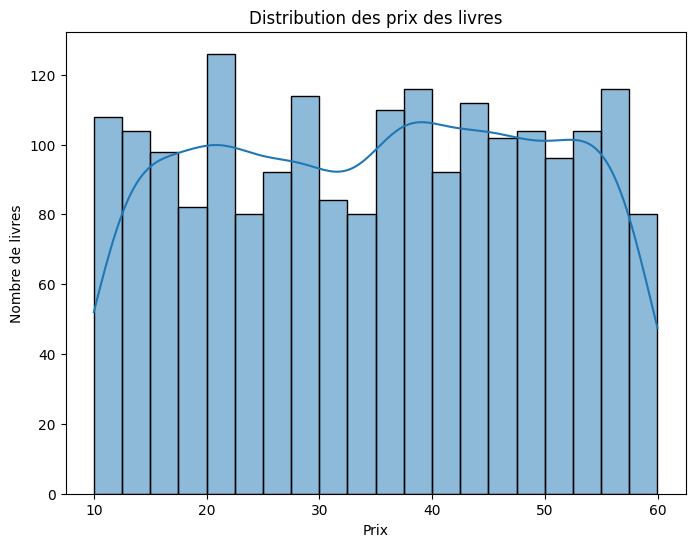

In [26]:
# Distribution de la variable 'price'
plt.figure(figsize=(8, 6))
sns.histplot(df1['price'], bins=20, kde=True)
plt.xlabel('Prix')
plt.ylabel('Nombre de livres')
plt.title('Distribution des prix des livres')
plt.show()

* Distribution de la variable 'availability' 

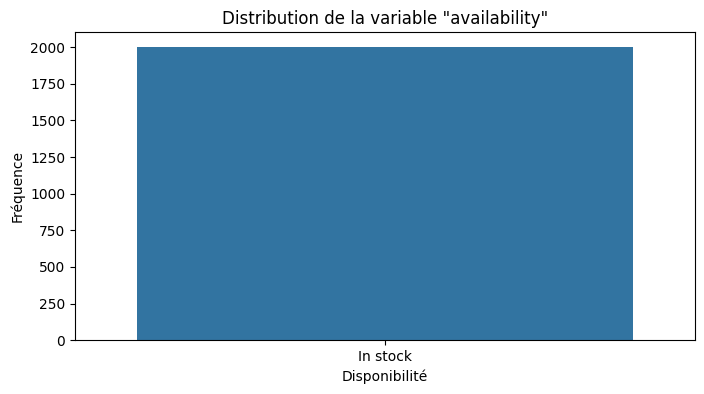

In [27]:
#Distribution de la variable 'availability' 
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='availability')
plt.title('Distribution de la variable "availability"')
plt.xlabel('Disponibilité')
plt.ylabel('Fréquence')
plt.show()


* Distribution de la variable 'rating'

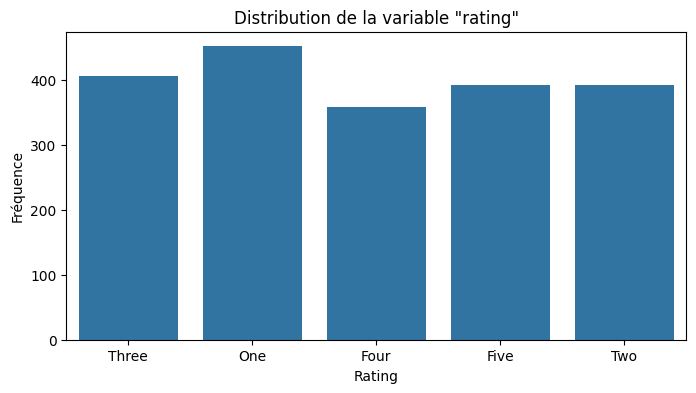

In [28]:
# Distribution de la variable 'rating'
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='rating')
plt.title('Distribution de la variable "rating"')
plt.xlabel('Rating')
plt.ylabel('Fréquence')
plt.show()

In [29]:
df1['rating'].value_counts()

rating
One      452
Three    406
Five     392
Two      392
Four     358
Name: count, dtype: int64

In [30]:
df1['rating'].value_counts().sort_index()

rating
Five     392
Four     358
One      452
Three    406
Two      392
Name: count, dtype: int64

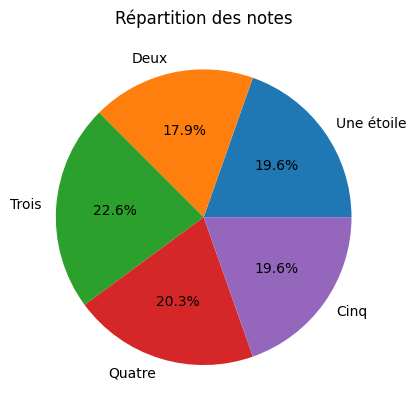

In [31]:
#représenter la répartition des notes en Pie Chart
notes = df1['rating'].value_counts().sort_index()
labels = ['Une étoile', 'Deux', 'Trois', 'Quatre', 'Cinq']
plt.pie(notes, labels=labels, autopct='%1.1f%%')
plt.title("Répartition des notes")
plt.show()

#### Analyser les categories de livres 

* comparer la catégorie 'Books' avec les reste des categories ..


In [32]:
books_category_books = df1[df1['category'] == 'Books']
books_category_books.shape

(1000, 5)

In [33]:
books_category = df1[df1['category'] != 'Books']
books_category.shape

(1000, 5)

In [34]:
print(df1['title'].nunique())

999


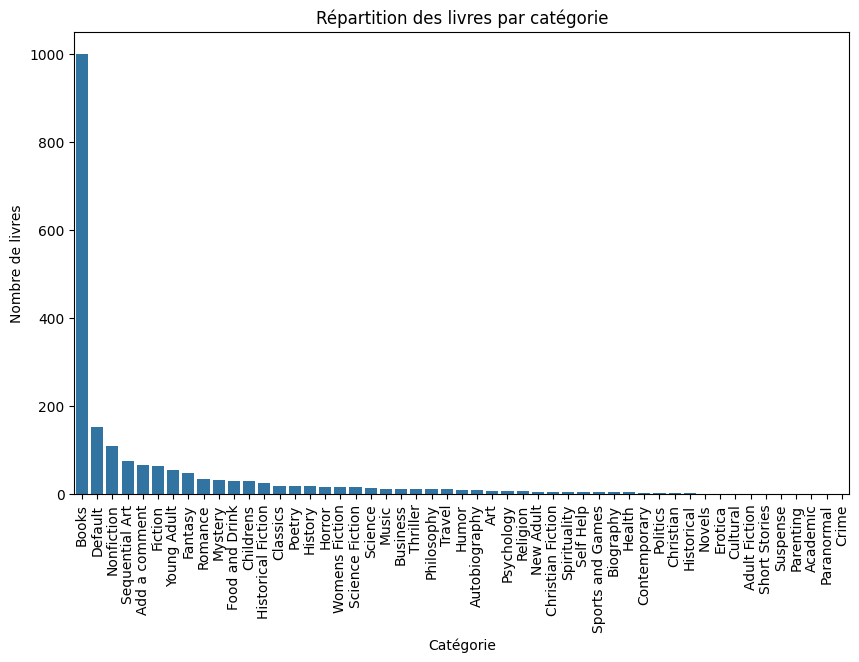

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df1, order=df1['category'].value_counts().index)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de livres')
plt.title('Répartition des livres par catégorie')
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()

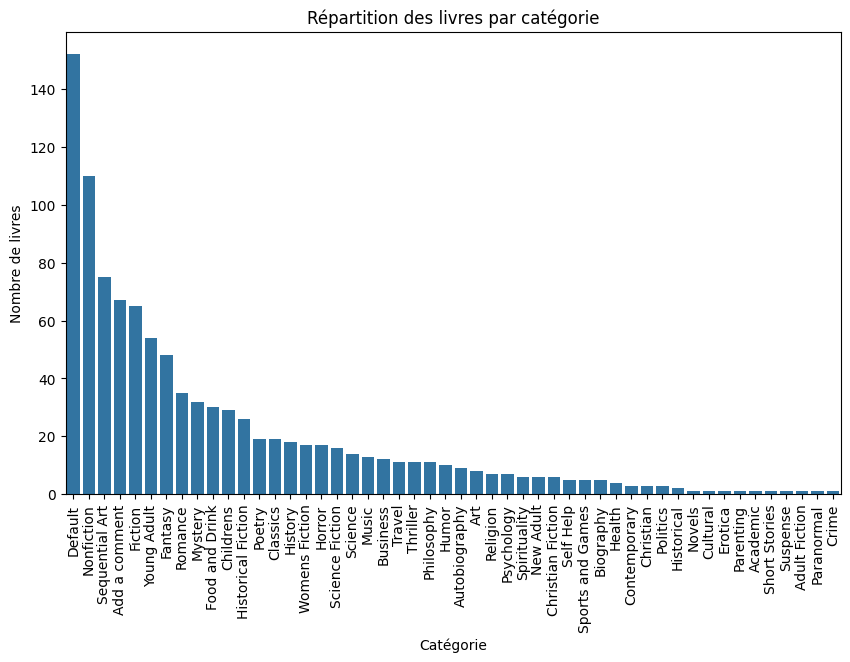

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df1[df1['category'] != 'Books'], order=df1[df1['category'] != 'Books']['category'].value_counts().index)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de livres')
plt.title('Répartition des livres par catégorie')
plt.xticks(rotation=90) 
plt.show()

#### Identifier les valeurs aberrantes (outliers)

* Création d'un boxplot pour le prix par catégorie


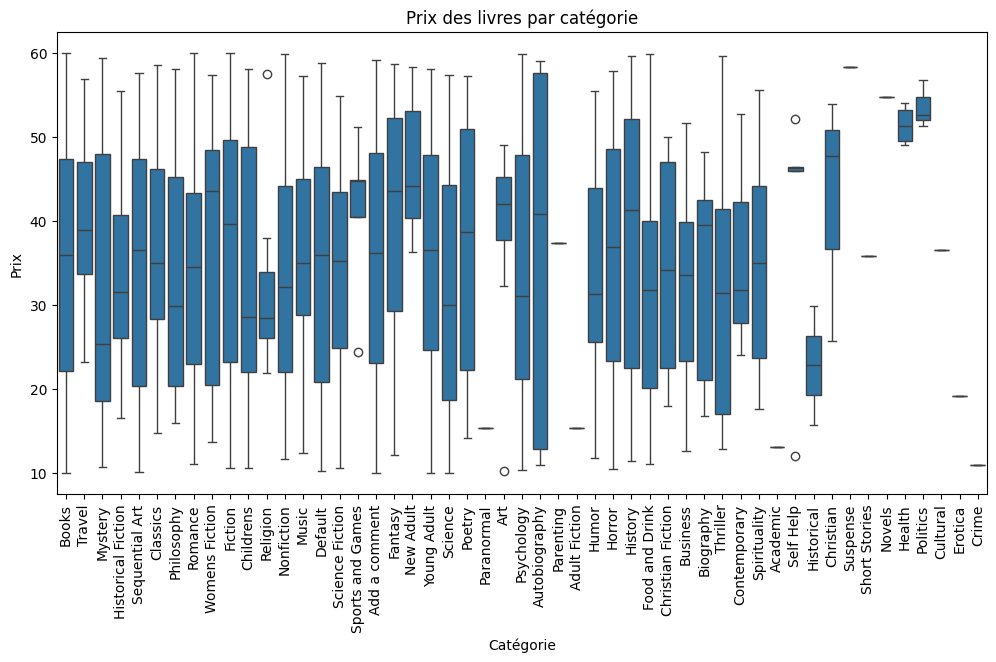

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df1)
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.title('Prix des livres par catégorie')
plt.xticks(rotation=90)
plt.show()

## Bonus:
- Proposer d'autres axes d'analyse
-continuer le scraping du site en récupérant plus d'informations sur les livres..